# TP4 : Mesure de la vitesse du son
### Auteur : ARGUELLO Camilo et RAHAL Lamine

### Introduction

Dans ce travail, nous désirons mesurer la vitesse du son. Pour cela nous utiliserons le mode "Chronomètre sonore" de Phyphox.
Nous placerons deux téléphones espacés d'une distance d et nous allons ensuite produire deux bruits en tapant dans nos mains, l'un proche du téléphone 1 et l'autre du 2.


In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import qexpy as q
import qexpy.plotting as qplt
from qexpy import MeasurementArray
import scipy.stats as stats
from scipy.optimize import minimize
from IPython.display import display, Math

### Mesure de la vitesse du son


#### Réalisation de l'expérience

Pour cette expérience, nous utiliserons l'application Phyphox qui nous permettra de mesurer le temps que met le son du clap pour aller d'un téléphone à un autre. Voilà donc les étapes pour réaliser ces mesures:

1. On place les téléphones à une distance d (parmis `0.5`,`1`,`2`,`3`,`4`,`5`).
2. La première personne réalise un clap situé à une distance a du téléphone 1.
3. La seconde personne réalise un deuxième clap à partir d'une distance b du téléphone 2.
4. On note les mesures affichées par chaque téléphone.

On obtient donc deux tableaux de la forme ($6 \times 10$) soit $10$ mesures pour les $6$ distances.

#### Questions préparatoires

Voici les grandeurs qu'on utilisera: $v$ la vitesse du son, $d$ la distance entre chaque téléphone, $a$ la distance entre le point d'origine du son 1 et le téléphone 1 et $b$ la distance entre le point d'origine du son 2 et le téléphone 2. On note qu'on choisit de réaliser les "claps" alignés aux deux téléphones (et non pas au-dessus) afin de pouvoir écrire: $a+d$ la distance du "clap" 1 au téléphone 2 et $b+d$ celle du "clap" 2 au téléphone 1. 

![Mesure clap](https://camiloarguello.xyz/img/clap_mesures.jpg)

On définit donc $t_{1->1}$ et $t_{1->2}$ les temps d'arrivés du "clap 1" sur le téléphone 1 et 2 ainsi que $t_{2->1}$ et $t_{2->2}$ pour le "clap 2". 

On a alors: $\Delta t_1 = t_{2->1}-t_{1->1}$ et $\Delta t_2 = t_{2->2}-t_{1->2}$ les intervalles de temps mesuré par chaque téléphone.


On peut donc écrire: $$\Delta t_1 = \frac{b+d}{v} - \frac{a}{v} = \frac{b-a+d}{v}$$ et $$\Delta t_2 = \frac{b}{v} - \frac{a+d}{v} = \frac{b-a-d}{v}.$$
On a alors:$\Delta t_1 - \Delta t_2 = \frac{2d}{v}.$

Ainsi, pour trouver la vitesse du son en fonction de $\Delta t_1$ et $\Delta t_2$, on écrira simplement:

$$v=\frac{2d}{\Delta t_1 - \Delta t_2} .$$

Comme on l'a expliqué plus haut, il vaut mieux de faire les bruits dans l'alignement des deux téléphones afin d'avoir les distances a,b et d sur une ligne. Si on les faisait au-dessus,on aurait des angles droits.

On prend comme valeur de vitesse théorique du son égale à $340 \frac{m}{s}$.

In [2]:
# constantes
v_theorique = 340 # m/s

### Prise des données

On a effectuée la prise de données en suivant le protocole expérimentale décrit dans le document du TP, ensuite on a mis les valeurs calculées en listes `python` avec le temps enregistrés dans chacun des deux téléphones `t1d` et `t2d`.

In [3]:
num_measures = 10 # Nombre de mesures pour chaque distance
distances = np.array([0.5, 1, 2, 3, 4, 5]) # Liste des distances en mètres
error_distance = 0.01 # m

#Pour d = 0.5 m

t1d = np.array([2.936, 1.719, 0.962, 2.014, 1.925, 1.991, 1.723, 1.367, 1.542, 2.014]) #[s]
t2d = np.array([2.934, 1.722, 0.959, 2.011, 1.922, 1.988, 1.719, 1.364, 1.539, 2.011]) #[s]

#Pour d = 1 m

t1d1 = np.array([1.666, 1.336, 2.171, 1.782, 1.675 , 1.705, 1.765, 1.472, 1.720, 1.555]) #[s]
t2d1 = np.array([1.662, 1.330, 2.166, 1.777, 1.669 , 1.698, 1.755, 1.467, 1.714, 1.549]) #[s]

#Pour d = 2 m

t1d2 = np.array([1.510, 1.545,1.537 , 1.970, 1.203, 1.550, 1.314, 1.189, 1.482, 1.389]) #[s]
t2d2 = np.array([1.500, 1.532, 1.526,1.958, 1.190, 1.538, 1.302, 1.178, 1.469, 1.377]) #[s]

#Pour d = 3 m

t1d3 = np.array([1.334, 1.318, 1.672, 1.610, 1.571, 1.100, 1.526, 1.129, 1.497 , 1.072]) #[s]
t2d3 = np.array([1.315 , 1.301, 1.665, 1.593, 1.554, 1.083, 1.509, 1.111, 1.479, 1.055]) #[s]

#Pour d = 4m

t1d4 = np.array([1.225, 1.371, 0.929, 0.908, 1.526, 1.215, 1.192, 0.923, 1.150, 1.086]) #[s]
t2d4 = np.array([1.202, 1.351, 0.905, 0.883, 1.492, 1.192, 1.170, 0.898, 1.127, 1.064]) #[s]

#Pour d = 5 m

t1d5 = np.array([1.070, 1.205, 1.067, 1.093, 1.117, 1.410, 1.004, 1.312, 1.284, 1.316]) #[s]
t2d5 = np.array([1.039, 1.176, 1.037, 1.063, 1.086, 1.378, 0.974, 1.282, 1.256, 1.284]) #[s]

### Estimation des erreurs systématiques

Dans cette partie, nous cherchons à estimer quelques erreurs dûes à:

* Incertitude sur la mesure de la distance de entre les deux téléphone
* l'incertitude lié à l'appareil, les paramètre d'usine (calibration, précision du capteur, etc.) qui seront négligées dans la suite pour le mesure du temps t et delta t

L'estimation de l'erreur sur la mesure de la distance $d$ entre les deux téléphone est de l'ordre du $0.01 m$. 

L'estimation de l'erreur sur la mesure de $t$ dépend de plusieurs facteurs, tels que la précision de la calibration du capteur, la qualité de la conception du téléphone et la stabilité de la fixation du capteur. Pour notre cas, on considère l'erreur selon la formule suivante:

$$ \Delta \mu = \frac{\sigma}{\sqrt{N}} $$

Avec $N$ le nombre de mesures et $\sigma$ l'écart-type de la moyenne des mesures.

L'incertitudes sur la vitesse est calculée en utilisant les propagations des erreurs selon $v (d,t) = \frac{d}{t}$.

$$ \frac{\Delta v^2}{v^2} = \frac{\Delta d^2}{d^2} + \frac{\Delta t^2}{t^2} $$

d'où on a $\Delta v = v \sqrt{(\frac{\Delta d}{d})^2 + (\frac{\Delta t}{t})^2}$.

<IPython.core.display.Math object>

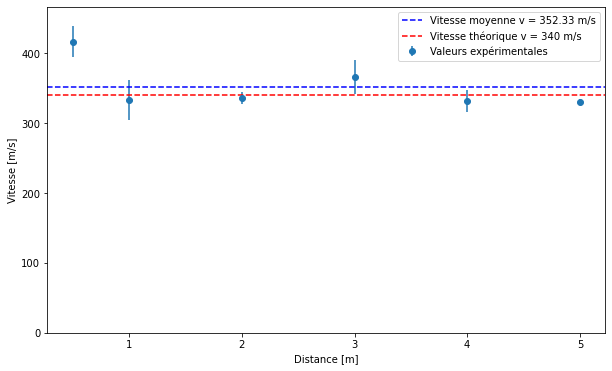

In [4]:
# Liste avec les temps pour chaque distance
times_measures_phone_1 = np.array([ t1d, t1d1, t1d2, t1d3, t1d4, t1d5 ])
times_measures_phone_2 = np.array([ t2d, t2d1, t2d2, t2d3, t2d4, t2d5 ])

# Calcul de différence de temps entre les deux téléphones pour chaque mesure
delta_measures_temps = np.abs(times_measures_phone_1 - times_measures_phone_2)
error_measures_temps = np.std(delta_measures_temps, axis=1) / np.sqrt(num_measures)

vitesses = np.array([])
erreurs = []

for i, d in enumerate(distances):
  Delta_t_1 = np.mean(times_measures_phone_1[i])
  Delta_t_2 = np.mean(times_measures_phone_2[i])
  v = 2 * d / (Delta_t_1 - Delta_t_2)
  
  # Propagation d'erreur sur v
  erreur = np.mean(v) * np.sqrt((error_distance / d)**2 + (error_measures_temps[i] / delta_measures_temps[i])**2)
  vitesses = np.append(vitesses, v)
  erreurs = np.append(erreurs, np.mean(erreur))
  
display(Math(r'\text{{Vitesse moyenne}} \; v = {:.2f} m \pm {:.2f} \, \text{{m/s}}'.format(np.mean(vitesses), np.mean(erreurs))))

plt.figure(figsize=(10, 6))
plt.errorbar(distances, vitesses, yerr=erreurs, fmt='o', label='Valeurs expérimentales')
plt.axhline(y=np.mean(vitesses), color='b', linestyle='--', label='Vitesse moyenne v = {:.2f} m/s'.format(np.mean(vitesses)))
plt.axhline(y=v_theorique, color='r', linestyle='--', label='Vitesse théorique v = 340 m/s')
plt.ylim(0, np.max(vitesses) + 50)
plt.xlabel('Distance [m]')
plt.ylabel('Vitesse [m/s]')
plt.legend()
plt.show()

In [5]:
diff_vitesse_theorique = np.abs(np.mean(vitesses) - v_theorique)
print('Différence entre la vitesse moyenne et la vitesse théorique : {:.2f} m/s'.format(np.mean(diff_vitesse_theorique)))

Différence entre la vitesse moyenne et la vitesse théorique : 12.33 m/s


On observe une vitesse proche de la valeur théorique, mais avec une incertitude importante autour de $\pm 17 m/s$ de la valeur mesurée.

## Ajustement des données

Nous allons ajuster les données expérimentales à trois modèles différents :

- Un modèle analytique par minimisation du $\chi^2$.
- Un modèle numérique de minimisation du $\chi^2$.
- Un modèle d'ajustement avec `qexpy`.

### Estimation analytique par minimisation du $\chi^2$

Il existe une relation linéaire entre $v$ et $\Delta t_1 - \Delta t_2$. Alors, maintenant on peut chercher une valeur de $v$ qui minimise $\chi ^2$.

On a donc:

$$ f(x) = a \, x $$ 

On peut donc calculer $a$ et puis $v$:

$$ A = \sum_{i=1}^{n} \frac{x_i y_i}{\sigma_i^2}, \ B = \sum_{i=1}^{n} \frac{x_i^2}{\sigma _i^2}, \ C = \sum_{i=1}^{n} \frac{x_i}{\sigma _i^2}, \ D = \sum_{i=1}^{n} \frac{y_i}{\sigma _i^2}, \ E = \sum_{i=1}^{n} \frac{1}{\sigma _i^2} $$

$$ \hat{a} = \frac{AE-DC}{BE-C^2} $$

$$ \hat{a} = \frac{A}{B} $$

$$ v = \frac{2}{\hat{a}} $$





In [6]:
A = 0
B = 0 
C = 0 
D = 0 
E = 0

sigma = 0.001

for i in range(len(distances)):
  x_i = distances[i]
  y_i = delta_measures_temps[i]
  A += x_i * y_i / sigma**2
  B += x_i**2 / sigma**2

a = A / B
v = 2 / a

# Coefficient directeur f = a x
display(Math(r'v = {:.2f} \pm {:.2f} \, \text{{m/s}}'.format(np.mean(v), np.std(v) / np.sqrt(len(vitesses)))))

<IPython.core.display.Math object>

L'ajustement par la méthode analytique nous a donné une valeur de $v$ égale à $337.63 \; m/s$, qui est très proche de la valeur théorique de $340 \; m/s$. De même, l'incertitude sur la vitesse diminuée.

### Minimisation numérique de $\chi ^2$

Nous cherchons maintenant à créer une fonction qui calcule le $\chi ^2$ afin de déterminer les valeurs optimales de $v$. Cette fonction trouvera les valeurs de $v$ qui minimisent $\chi ^2$, en ajustant la relation $\frac{t - 2 d}{v}$.

On pose:

$$ \chi^2 = \sum_{i=1}^{n} \frac{\left( \frac{t_i - 2 \, d_i}{v} \right)^2}{\sigma_i^2} $$

Tous les ajustements ont convergé: True


<IPython.core.display.Math object>

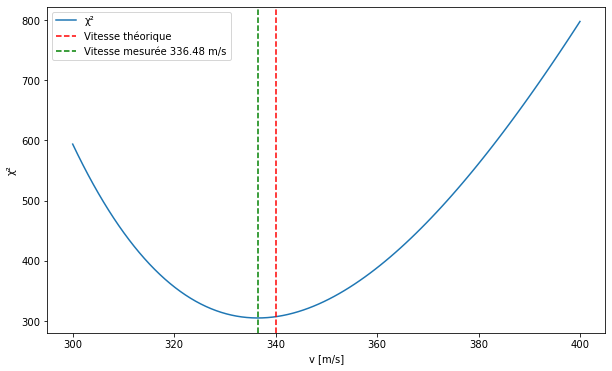

In [7]:
def chi_squared(v):
    chi_squared = 0
    for i in range(len(distances)):
        chi_squared += np.sum(((delta_measures_temps[i] - (2 *distances[i] / v))**2 / 0.001**2))
    return chi_squared

# Tracé de χ^2 en fonction de v
v_values = np.linspace(300, 400, 100) # Plage de valeurs pour v
chi_squared_values = np.array([chi_squared(v) for v in v_values])  # Calcul de χ^2 pour chaque valeur de v

results = np.array([minimize(chi_squared, v) for v in v_values])
all_converged = all([result.success for result in results])
print(f'Tous les ajustements ont convergé: {all_converged}')

vs = np.array([result.x for result in results])
display(Math(r'v = {:.2f} \pm {:.3f} \, \text{{m/s}} = {:.2f} \, \text{{m/s}}'.format(np.mean(vs), np.std(vs) / np.sqrt(len(vitesses)),np.mean(vs))))

plt.figure(figsize=(10, 6))
plt.plot(v_values, chi_squared_values, label='χ²')
plt.axvline(x=v_theorique, color='r', linestyle='--', label='Vitesse théorique')
plt.axvline(x=np.mean(vs), color='g', linestyle='--', label='Vitesse mesurée {:.2f} m/s'.format(np.mean(vs)))
plt.xlabel('v [m/s]')
plt.ylabel('χ²')
plt.legend()
plt.show()

Comme on peut le voir dans la figure, cette courbe prend la forme d'une parabole. On note aussi qu'on obtiens un $\chi ^2$ de $336.48 m/s$. Où la valeur est proche à celle de la valeur théorique. L'incertitude sur la vitesse tend vers $0$. Ce qui rend la valeur de la vitesse plus précise.

### Ajustement avec `qexpy`

Finalement, nous utiliserons `qexpy` pour ajuster les données expérimentales. Nous utiliserons la fonction `fit`. De même que pour la fonction de minimisation numérique, nous utiliserons $x_i$ comme les valeurs par rapport le temps, et $y_i$ comme les valeurs de la distance.

Erreurs relatives sur les temps: 0.71 %
Erreurs relatives sur les distances 4.58 %


<IPython.core.display.Math object>

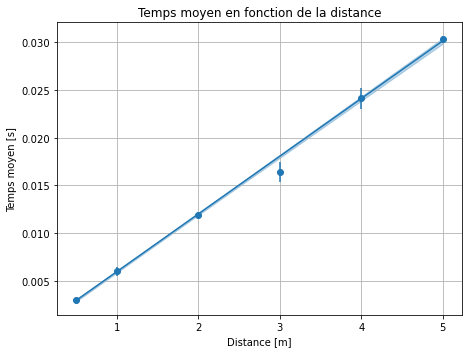

In [8]:
xs = MeasurementArray(distances, error_distance * np.ones_like(distances), 'm')
ys = MeasurementArray(np.mean(delta_measures_temps, axis=1), error_measures_temps, unit='s', name='Temps moyen')

dxs = error_distance / distances
dys = error_measures_temps / np.mean(delta_measures_temps, axis=1)

print('Erreurs relatives sur les temps: {:.2f} %'.format(np.mean(dxs) * 100))
print('Erreurs relatives sur les distances {:.2f} %'.format(np.mean(dys) * 100))

qplt.plot(xs, ys)
figure = qplt.get_plot()

results = figure.fit(model=q.FitModel.LINEAR, xerror=dxs, yerror=dys)

q_a = results.params[0].value
q_b = results.params[1].value
q_a_error = results.params[0].error

q_v = 2 / q_a

display(Math(r'v = {:.2f} \pm {:.4f} \, \text{{m/s}}'.format(q_v, q_a_error)))

figure.title = 'Temps moyen en fonction de la distance'
figure.error_bars()
figure.xname = 'Distance [m]'
figure.yname = 'Temps moyen '
qplt.show()


De la même manière que pour les deux autres méthodes, on obtient une valeur de $v$ proche de la valeur théorique. Cependant, cette fois-ci de $331.5 \; m/s$. On peut concluire que cette méthode est la moins précise des trois, car on est éloigné une valeur de $8.5 \; m/s$ de la valeur théorique.

### Conclusion


Dans cette expérience o a mesuré la vitesse du son, nous avons utilisé l'application Phyphox et avons réalisé des mesures des temps de claps à partir de différentes distances. Ainsi, nous avons ajusté ces mesures à un modèle en utilisant plusieurs méthodes : la minimisation du $\chi^2$ de manière analytique ainsi que numérique, et enfin un ajustement avec `qexpy`. En comparant les trois méthodes utilisées, nous avons constaté que la méthode de minimisation du $\chi^2$ de manière numérique est la plus précise.

Les résultats expérimentaux ont montré que les vitesses mesurées correspondaient assez bien à la valeur réelle, avec une vitesse moyenne du son de $336 m/s$, qui est proche de la valeur attendue de $340 m/s$.